## Web Semântica

In [1]:
!pip3 install rdflib

In [3]:
from rdflib import Graph
from rdflib import Namespace

In [4]:
g = Graph()
g.parse(location="openuai.rdf", format='turtle')


<Graph identifier=N6a3a44eedf434e3fb7eedd2b7dad5f1d (<class 'rdflib.graph.Graph'>)>

In [9]:
for (suj, pred, obj) in g:
    print(suj, pred, obj)

http://openuai.ifpb.edu.br/ouai#researchproject55 http://openuai.ifpb.edu.br/ouai#yearOfStart 2011
http://openuai.ifpb.edu.br/ouai#researchproject58 http://purl.org/dc/terms/title Estendendo o CODI Data Service para um Plugin de Gerenciamento de Contexto de Usuário
http://openuai.ifpb.edu.br/ouai#bibliography118 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://openuai.ifpb.edu.br/ouai#Bibliography
http://openuai.ifpb.edu.br/ouai#courseClass26 http://purl.org/dc/terms/identifier 26
http://openuai.ifpb.edu.br/ouai#researchproject55 http://openuai.ifpb.edu.br/ouai#yearOfCompletion 2012
http://openuai.ifpb.edu.br/ouai#bibliography132 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://openuai.ifpb.edu.br/ouai#Bibliography
http://openuai.ifpb.edu.br/ouai#courseClass16 http://openuai.ifpb.edu.br/ouai#classReference 20161
http://openuai.ifpb.edu.br/ouai#courseClass183 http://purl.org/dc/terms/identifier 183
http://openuai.ifpb.edu.br/ouai#courseClass231 http://openuai.ifpb.edu.br/oua

## Adicionando novas triplas ao grafo

In [13]:
DBR = Namespace('http://dbpedia.org/resource/')
DBO = Namespace('http://dbpedia.org/ontology/')

## Adicionando local de nascimento aos professores existentes
for (suj, pred, obj) in g:
    if obj in DBO.Professor:
        g.add([suj, DBO.birthPlace, DBR['João_Pessoa,_Paraíba']])

In [14]:
## Adicionando novo professor

from rdflib import RDF, FOAF, Literal, Namespace, URIRef

OUAI = Namespace('http://openuai.ifpb.edu.br/ouai#')
W3TIME = Namespace('http://www.w3.org/2006/time#')
DC = Namespace('http://purl.org/dc/terms/')

g.add([OUAI.professor32, RDF.type, DBO.Professor])
g.add([OUAI.professor32, OUAI.lattesURL, URIRef("http://lattes.cnpq.br/4442363726982518")])
g.add([OUAI.professor32, FOAF.name, Literal("Diego Ernesto Rosa Pessoa")])
g.add([OUAI.professor32, OUAI.hasSubarea, OUAI.subarea12]), 
g.add([OUAI.professor32, OUAI.citationName, Literal("Diego Pessoa; PESSOA, DIEGO")])
g.add([OUAI.professor32, DBO.birthPlace, DBR['Campina_Grande']])


g.add([OUAI.courseClass142, OUAI.taughtBy, OUAI.professor32])

g.add([OUAI.coursesubject36, RDF.type, OUAI.CourseSubject])
g.add([OUAI.coursesubject36, OUAI.courseContent, Literal("Aborda as diferentes formas de armazenamento e organização de informações em um computador, com foco em estruturas como arrays, listas, pilhas, filas, árvores, grafos e tabelas hash.")])
g.add([OUAI.coursesubject36, OUAI.courseSemester, Literal(2)])
g.add([OUAI.coursesubject36, DC.title, Literal("Programação e Estrutura de Dados")])
g.add([OUAI.coursesubject36, W3TIME.hours, Literal(50.0)])
g.add([OUAI.coursesubject36, OUAI.hasBibliography, OUAI.bibliography35])
g.add([OUAI.coursesubject36, OUAI.hasBibliography, OUAI.bibliography39])
g.add([OUAI.coursesubject36, OUAI.hasBibliography, OUAI.bibliography40])

g.add([OUAI.courseClass302, RDF.type, OUAI.CourseClass])
g.add([OUAI.courseClass302, OUAI.hasCourseSubject, OUAI.coursesubject36])
g.add([OUAI.courseClass302, OUAI.classReference, Literal(20231)])
g.add([OUAI.courseClass302, OUAI.taughtBy, OUAI.professor32])



<Graph identifier=N6a3a44eedf434e3fb7eedd2b7dad5f1d (<class 'rdflib.graph.Graph'>)>

In [15]:
for (suj, pred, obj) in g:
    print(suj, pred, obj)

http://openuai.ifpb.edu.br/ouai#researchproject55 http://openuai.ifpb.edu.br/ouai#yearOfStart 2011
http://openuai.ifpb.edu.br/ouai#researchproject58 http://purl.org/dc/terms/title Estendendo o CODI Data Service para um Plugin de Gerenciamento de Contexto de Usuário
http://openuai.ifpb.edu.br/ouai#bibliography118 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://openuai.ifpb.edu.br/ouai#Bibliography
http://openuai.ifpb.edu.br/ouai#courseClass26 http://purl.org/dc/terms/identifier 26
http://openuai.ifpb.edu.br/ouai#researchproject55 http://openuai.ifpb.edu.br/ouai#yearOfCompletion 2012
http://openuai.ifpb.edu.br/ouai#bibliography132 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://openuai.ifpb.edu.br/ouai#Bibliography
http://openuai.ifpb.edu.br/ouai#courseClass16 http://openuai.ifpb.edu.br/ouai#classReference 20161
http://openuai.ifpb.edu.br/ouai#courseClass183 http://purl.org/dc/terms/identifier 183
http://openuai.ifpb.edu.br/ouai#courseClass231 http://openuai.ifpb.edu.br/oua

## Consultas SPARQL

### Cenário 1 - Listar nomes de todas as disciplinas lecionadas por um professor

In [27]:
from rdflib import FOAF

prof = 'Diego'

query = """
    SELECT distinct ?title
    WHERE {
        ?classe <http://openuai.ifpb.edu.br/ouai#taughtBy> ?prof ;
            <http://openuai.ifpb.edu.br/ouai#hasCourseSubject> ?subj .
        ?subj <http://purl.org/dc/terms/title> ?title .
        ?prof foaf:name ?name .
        FILTER contains(?name, ':prof')
    }
    """.replace(':prof', prof)

res = g.query(query, initNs={'foaf': FOAF})
for r in res:
    print(r.title)

Banco de Dados I
Programação e Estrutura de Dados


### Cenário 2 - Listar todos os professores cadastrados

In [16]:
query = """
    SELECT distinct ?name
    WHERE {
        ?classe <http://openuai.ifpb.edu.br/ouai#taughtBy> ?prof .
        ?prof foaf:name ?name .
    }
    """
res = g.query(query, initNs={'foaf': FOAF})
for r in res:
    print(r.name)

Luiz Carlos Rodrigues Chaves
Crishane Azevedo Freire
Marcus Vinicius Delgado Varandas
Frederico Costa Guedes Pereira
Caio Sérgio de Vasconcelos Batista
Edemberg Rocha da Silva
Nilton Freire Santos
Francisco Petrônio Alencar de Medeiros
Nadja da Nobrega Rodrigues
Fausto Véras Maranhão Ayres
Damires Yluska de Souza Fernandes
Denio Mariz Timoteo de Sousa
Heremita Brasileiro Lira
Cândido José Ramos do Egypto
Valéria Maria Bezerra Cavalcanti
Lafayette Batista Melo
Daniel Fernandes Vilar Cardoso
Paulo Roberto Santos Costa
Alex Sandro da Cunha Rêgo
Paulo Ditarso Maciel Júnior
Jaildo Tavares Pequeno
Juliana Dantas Ribeiro Viana de Medeiros
Fabrizia Medeiros de Sousa Matos
Luciana Pereira Oliveira
José Gomes Quaresma Filho
Diego Ernesto Rosa Pessoa


### Cenário 3 - Todos os projetos de pesquisa que iniciaram entre 2011 e 2014

In [19]:
from rdflib import XSD

query = """
    SELECT ?title ?yearOfStart ?yearOfCompletation
    WHERE {
        ?researchProject <http://openuai.ifpb.edu.br/ouai#yearOfStart> ?yearOfStart ;
            <http://openuai.ifpb.edu.br/ouai#yearOfCompletion> ?yearOfCompletation ;
            <http://purl.org/dc/terms/title> ?title .
        FILTER (xsd:integer(?yearOfStart) >= 2011 && xsd:integer(?yearOfStart) <= 2014)
    }
    """
res = g.query(query, initNs={'foaf': FOAF, 'xsd': XSD})
for r in res:
    print(r.title, " - de", r.yearOfStart, "a", r.yearOfCompletation)

DESENVOLVIMENTO E MONITORAMENTO DE UMA APLICAÇÃO DE HEALTH CARE.  - de 2012 a 2014
A Necessidade de Behavior-Driven Development em Projetos com Ferramentas Rapid Application Development  - de 2014 a 2014
Monitoramento Abrangente das Interações Sociais em Ambientes Colaborativos Virtuais de Aprendizagem como Apoio a Presença Docente  - de 2013 a 2014
Gerenciamento de uma Infraestrutura Híbrida de Computação na Nuvem para Execução de Aplicacões e-Science, Dirigida por Métricas de Negócio  - de 2014 a 2014
Integrando a Ferramenta SenseRDF com o Framework SILK  - de 2013 a 2014
Avaliando o CODI4In por meio de uma Aplicação Educacional Sensível ao Contexto  - de 2013 a 2014
Desenvolvimento de um Controle Acadêmico para o Ambiente ?Textando?  - de 2013 a 2014
Análise do Discurso e Interação Humano-Computador: relações entre discurso e interface em redes sociais  - de 2013 a 2014
Desenvolvimento de um Editor de Recurso Textual Interativo para o Ambiente ?Textando? (PIBITI)  - de 2013 a 2014
U

### Cenário 4 - Todos os professores da área de banco de dados e a respectiva url do lattes 

In [20]:
from rdflib import XSD

query = """
    SELECT ?name ?urlLattes
    WHERE {
        ?prof <http://openuai.ifpb.edu.br/ouai#hasSubarea> ?subArea ;
            <http://openuai.ifpb.edu.br/ouai#lattesURL> ?urlLattes ;
            foaf:name ?name .
        ?subArea <http://purl.org/dc/terms/title> 'banco de dados' .
    }
    """
res = g.query(query, initNs={'foaf': FOAF, 'xsd': XSD})
for r in res:
    print(r.name, r.urlLattes)

Nilton Freire Santos http://lattes.cnpq.br/8043952591479554
Damires Yluska de Souza Fernandes http://lattes.cnpq.br/9411293540915384
Diego Ernesto Rosa Pessoa http://lattes.cnpq.br/4442363726982518


### Cenário 5 - Listar toda a bibliografia relacionada a banco de dados

In [21]:
from rdflib import XSD

query = """
    SELECT ?referencia
    WHERE {
        ?curso <http://openuai.ifpb.edu.br/ouai#hasBibliography> ?bibliografia ;
            <http://purl.org/dc/terms/title> ?disciplina .
        ?bibliografia <http://purl.org/dc/terms/description> ?referencia
        FILTER (contains(?disciplina, 'Banco de Dados'))
    }
    """
res = g.query(query, initNs={'foaf': FOAF, 'xsd': XSD})
for r in res:
    print(r.referencia)

ELMASRI, Ramez A C Navathe, Shamkant B. – Sistemas de Banco de Dados – Pearson/Addison Wesley Pub Co Inc – 4a Edição, 2005. 
HEUSER, Carlos Alberto. Projeto de Banco de Dados. Editora Sagra-Luzzatto
KORTH, Henry F. Sistemas de Bancos de Dados. 3ª ed. São Paulo: Makron Books, 1998. 
BATINI, Carol e NAVATH
ULLMAN J., WIDOM J. A First Course in Database Systems. Prentice Hall., 1997.
DATE, C. J. Introdução aos Sistemas de Bancos de Dados. Editora Campus
ELMASRI, Ramez A C Navathe, Shamkant B. – Sistemas de Banco de Dados – Pearson/Addison Wesley Pub Co Inc (LT) – 4a Edição, 2005. 

TAMER ÖZSU M. e VALDURIEZ Patrick  - Princípios de Sistemas de Bancos de Dados Distribuídos, ,  Editora Campus  - Tradução d
ULLMAN J., WIDOM J. A First Course in Database Systems. Prentice Hall., 1997.
DATE, C. J. Introdução aos Sistemas de Bancos de Dados. Editora Campus


## Combinando fontes de dados (OUAI e DBPedia)

### Cenário 6 - Listar professores que nasceram em uma cidade com menos de 500 mil habitantes

In [28]:
g.parse("https://dbpedia.org/resource/Campina_Grande")
g.parse("https://dbpedia.org/resource/João_Pessoa,_Paraíba")
g.parse("https://dbpedia.org/resource/Paraíba")

<Graph identifier=N6a3a44eedf434e3fb7eedd2b7dad5f1d (<class 'rdflib.graph.Graph'>)>

In [21]:
for (suj, pred, obj) in g:
    print(suj, pred, obj)

http://openuai.ifpb.edu.br/ouai#courseClass192 http://openuai.ifpb.edu.br/ouai#classReference 20152
http://openuai.ifpb.edu.br/ouai#bibliography79 http://purl.org/dc/terms/identifier 79
http://dbpedia.org/resource/Paraíba http://dbpedia.org/property/city Pombal, ParaíbaPombal
http://dbpedia.org/resource/Campina_Grande http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Acácio_Figueiredo_(Campina_Grande)
http://dbpedia.org/resource/Campina_Grande http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dbpedia.org/class/yago/WikicatPopulatedPlacesInParaíba
http://openuai.ifpb.edu.br/ouai#bibliography53 http://purl.org/dc/terms/description KUROSE, James F. e ROSS, Keith W. Redes de Computadores e a Internet: Uma Nova Abordagem. Addison Wesley Bra, 3ª Edição - 2005
http://openuai.ifpb.edu.br/ouai#courseClass93 http://purl.org/dc/terms/identifier 93
http://openuai.ifpb.edu.br/ouai#researchproject18 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://dbpedia.org/ontolo

In [23]:
from rdflib import XSD, Namespace, FOAF

DBP = Namespace('http://dbpedia.org/property/')
DBO = Namespace('http://dbpedia.org/ontology/')

query = """
    SELECT ?nome ?nomeCidade ?populacao
    WHERE {
        ?prof dbo:birthPlace ?cidade ;
            foaf:name ?nome .
        ?cidade foaf:name ?nomeCidade .
        { ?cidade dbp:populationEst ?populacao }
        UNION
        { ?cidade dbo:populationTotal ?populacao }
        
        FILTER (xsd:integer(?populacao) <= 500000)
    }
    GROUP BY ?nome ?populacao
    """
res = g.query(query, initNs={'dbo': DBO, 'foaf': FOAF, 'dbp': DBP, 'xsd': XSD})
for r in res:
    print(r.nome, r.nomeCidade, r.populacao)

Diego Ernesto Rosa Pessoa Campina Grande 411807


## Cenário 7 - Exibir foto da cidade e bandeira do estado em que um determinado professor nasceu

In [32]:
from rdflib import XSD
from IPython.display import Image, display


DBP = Namespace('http://dbpedia.org/property/')
DBO = Namespace('http://dbpedia.org/ontology/')
DBR = Namespace('http://dbpedia.org/resource/')

professor = 'Diego'

query = """
    SELECT ?nome ?estado ?bandeiraEstado ?imagemCidade
    WHERE {
        ?prof dbo:birthPlace ?cidade ;
            foaf:name ?nome .
        ?cidade dbo:subdivision ?estado ;
            dbo:thumbnail ?imagemCidade .
        ?estado dbo:type dbr:States_of_Brazil ;
            dbo:thumbnail ?bandeiraEstado .
        FILTER( contains(?nome, ':prof') )
    }
    GROUP BY ?nome ?estado
    """.replace(":prof", professor)

res = g.query(query, initNs={'dbo': DBO, 'foaf': FOAF, 'dbp': DBP, 'dbr': DBR, 'xsd': XSD})
for r in res:
    print(r.nome, r.estado)
    display(Image(url=r.imagemCidade))
    display(Image(url=r.bandeiraEstado))

Diego Ernesto Rosa Pessoa http://dbpedia.org/resource/Paraíba


## Visualização do grafo

In [30]:
!pip install pydotplus
!pip install graphviz

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

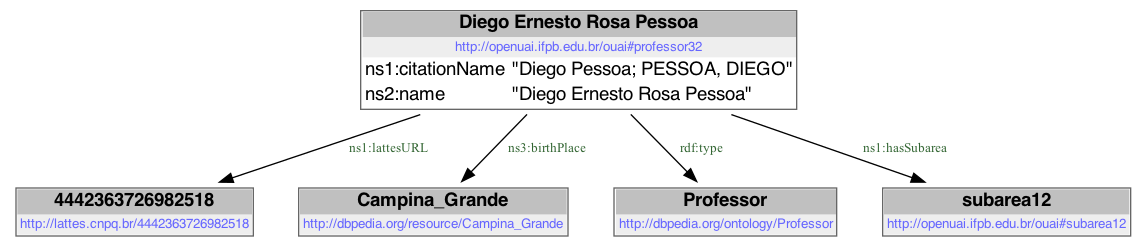

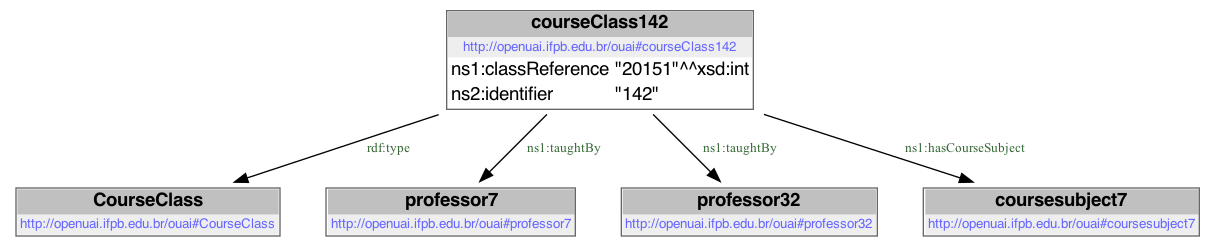

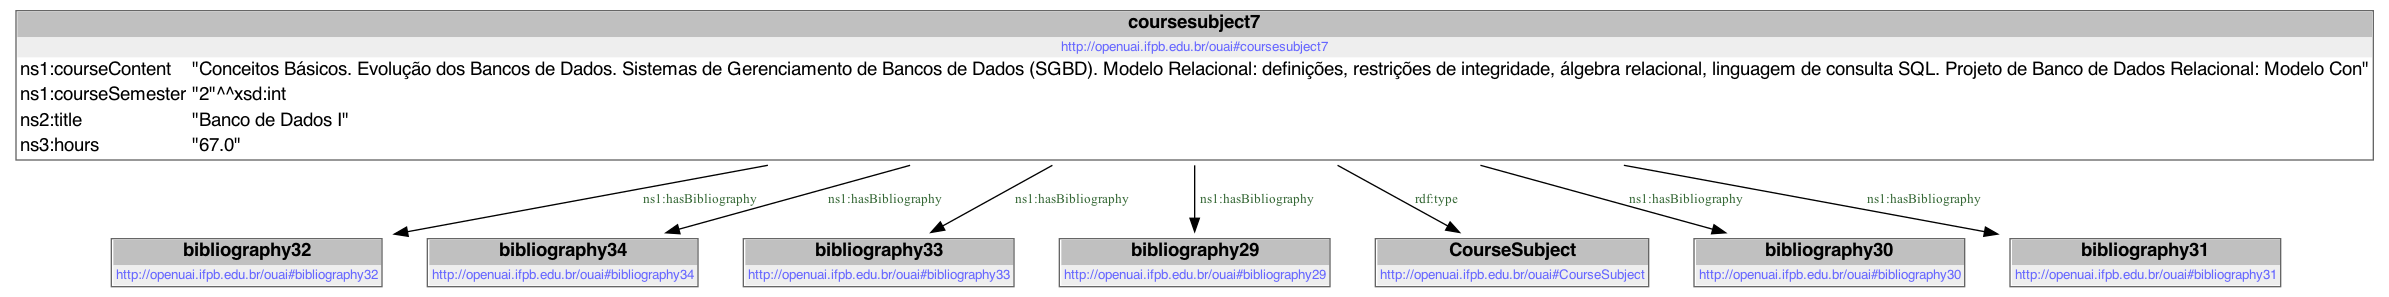

In [27]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g.cbd(OUAI.professor32))
visualize(g.cbd(OUAI.courseClass142))
visualize(g.cbd(OUAI.coursesubject7))